# Pixel Prediction MVP

## Introduction

### Objective
This project aims to monitor and quantify deforestation using machine learning models applied to satellite imagery.
Using 2016's Landsat 8 data from Google's MultiEarth Challenge, we trained a U-Net model to predict deforestation regions based on pixel-level classifications.

### Why It Matters
If the actual deforestation trend continues, our grandchildren may live in a world without rainforests. 

### Proposed Solution
Our solution uses a U-Net model to analyze satellite imagery and detect deforestation patterns. Our MVP is designed to:
- Utilize RGB bands from Landsat 8 data.
- Train the model using 2016 data.
- Predict deforestation on 2021 data.

## Dataset Overview

### Landsat 8 Imagery
We utilize Landsat 8 imagery for this project. Each image consists of multiple spectral bands, including the visible spectrum (R, G, B) used for visualization and analysis.

### Label Data
The dataset includes labeled masks indicating deforestation areas. These masks are binary:
- `0`: Non-deforested
- `1`: Deforested

Below is an example of an RGB satellite image and its corresponding deforestation mask.

In [3]:
import os
import numpy as np
from utils.params import DIRECTORY_X, DIRECTORY_Y, PROCESSED_DIR
from scripts.preprocess import small_data

# Paths and constants
images_path = DIRECTORY_X
targets_path = DIRECTORY_Y

# 1. Count the number of files in raw images and targets
num_images = len([f for f in os.listdir(images_path) if f.endswith(".tiff")])
num_targets = len([f for f in os.listdir(targets_path) if f.endswith(".tiff")])

print(f"Number of image files in '{images_path}': {num_images}")
print(f"Number of label files in '{targets_path}': {num_targets}")

# 2. Load the preprocessed dataset
X_train_path = os.path.join(PROCESSED_DIR, "X_train.npy")
y_train_path = os.path.join(PROCESSED_DIR, "y_train.npy")

X_train = np.load(X_train_path)
y_train = np.load(y_train_path)

print(f"Dataset created:")
print(f" - X_train shape: {X_train.shape}")
print(f" - y_train shape: {y_train.shape}")
print(f" - Data type: {X_train.dtype}, {y_train.dtype}")

Number of image files in '/Users/gont/code/acgontijo/pixel_prediction/data/raw/images': 2099025
Number of label files in '/Users/gont/code/acgontijo/pixel_prediction/data/raw/targets': 17215
Dataset created:
 - X_train shape: (1000, 85, 85, 3)
 - y_train shape: (1000, 85, 85)
 - Data type: uint16, uint8


## Model Training

### Steps
1. **Load Preprocessed Data**:
    - The training data (`X_train`, `y_train`) are loaded from the processed directory.
2. **Build the U-Net Model**:
    - We use the U-Net architecture for semantic segmentation, with the ability to handle multi-channel image input.
3. **Train the Model**:
    - The model is trained on the training data and validated on a subset of it. Training history is tracked to observe performance improvements.
4. **Save the Trained Model**:
    - The trained model and validation data (`X_val`, `y_val`) are saved for future inference and evaluation.
5. **Visualize Training Progress**:
    - Training and validation loss and accuracy are plotted to evaluate the model's performance.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 420ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..30552].


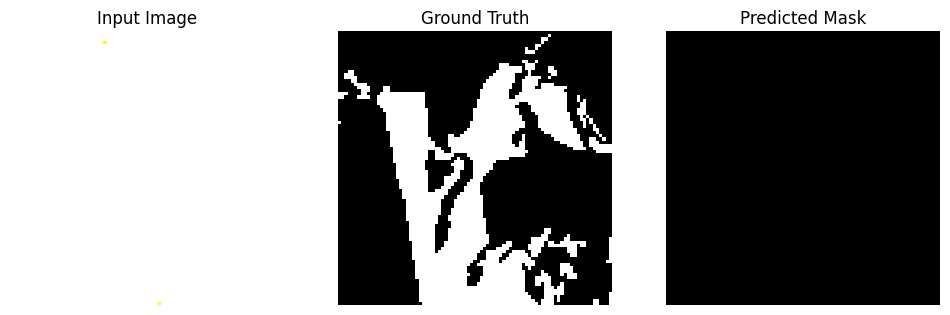

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [7252..18389].


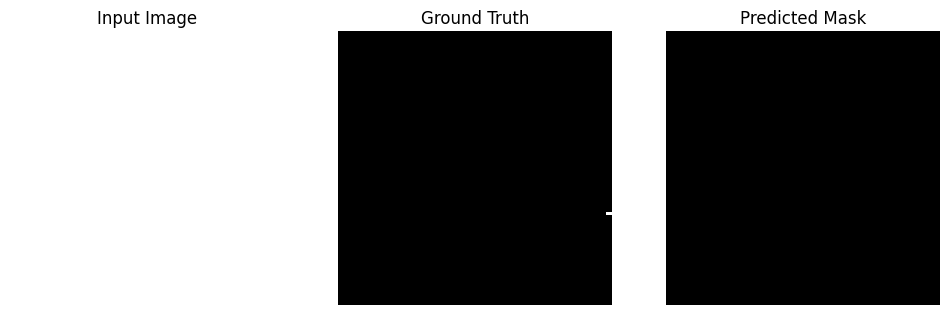

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6973..15222].


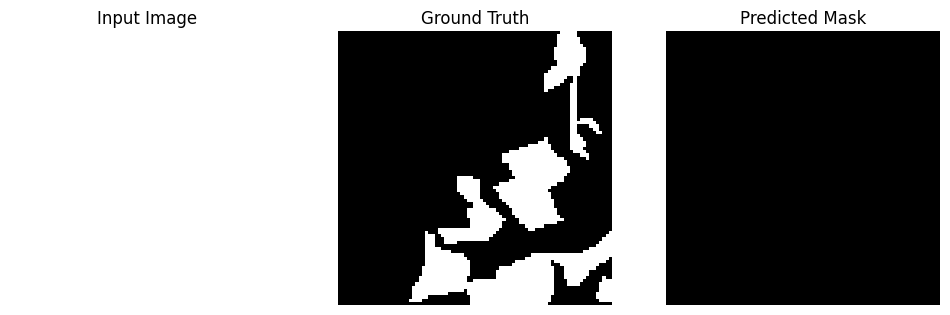

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [268..23047].


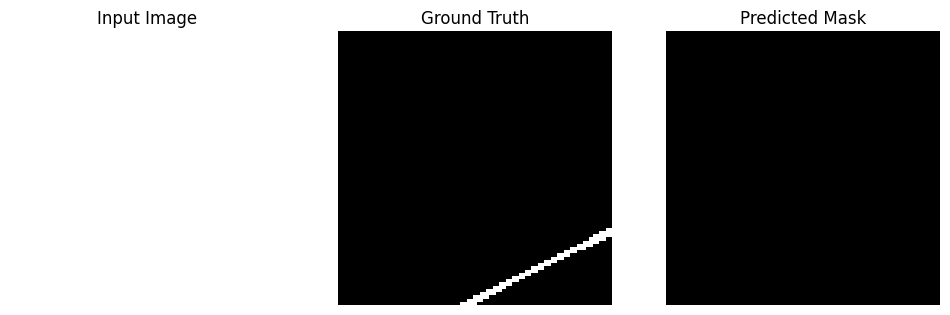

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1399..21552].


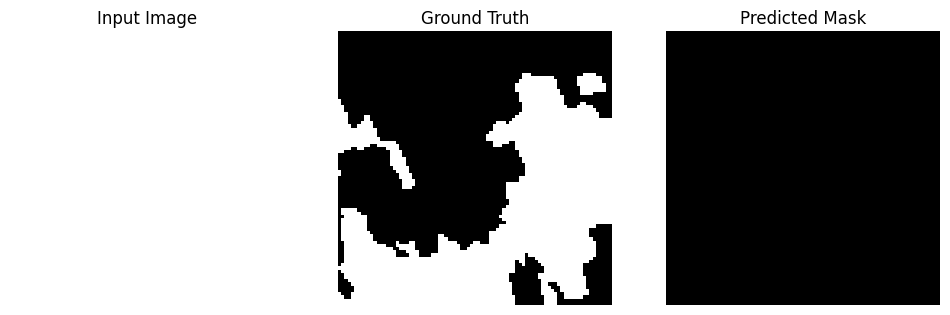

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from utils.params import PROCESSED_DIR, MODEL_DIR
from scripts.preprocess import load_image

# Load model and validation data
model = load_model(f"{MODEL_DIR}/trained_model.keras")
X_val = np.load(f"{PROCESSED_DIR}/X_val.npy")
y_val = np.load(f"{PROCESSED_DIR}/y_val.npy")

# Predict on validation data
y_pred = model.predict(X_val)

# unstack prediction


# Visualize the predictions
for i in range(5):  # Show 5 samples
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(X_val[i])
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(y_val[i].squeeze(), cmap="gray")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap="gray")
    plt.axis("off")

    plt.show()